<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/data/Tensor_Management.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


# Kata: Tensor Management

## Instructions

This is a self-correcting exercise generated by [nbgrader](https://github.com/jupyter/nbgrader). 

Complete the cells beginning with `# YOUR CODE HERE` and run the subsequent cells to check your code.

## Part 1: Tensor Basics

In [57]:
# Import NumPy
import numpy as np

### Question

Create a 2D tensor (a matrix) with dimensions (3,4) containing integer values of your choice. Store this tensor in a variable named `x`.

In [58]:
# YOUR CODE HERE
x= np.array([[2, 5, 6, 4], [5, 3, 5, 9], [2, 5 , 6, 0]])
x.shape

(3, 4)

In [59]:
print(x)
# Assert dimensions
assert x.ndim == 2
assert x.shape == (3, 4)
# Assert data type 
assert issubclass(x.dtype.type, np.integer)

[[2 5 6 4]
 [5 3 5 9]
 [2 5 6 0]]


### Question

Update the shape of the previous tensor so that it has dimensions (6,2).

In [60]:
# YOUR CODE HERE
x = x.reshape(6, 2)

In [61]:
print(x)
# Assert tensor dimensions
assert x.ndim == 2
assert x.shape == (6, 2)

[[2 5]
 [6 4]
 [5 3]
 [5 9]
 [2 5]
 [6 0]]


### Question

Change the type of the previous tensor values to `float32`.

In [62]:
# YOUR CODE HERE
x = x.astype(float)


In [63]:
print(x)
# Assert data type
assert issubclass(x.dtype.type, np.floating)

[[2. 5.]
 [6. 4.]
 [5. 3.]
 [5. 9.]
 [2. 5.]
 [6. 0.]]


### Question

Normalize the previous tensor so that it has a mean of 0 and a standard deviation of 1 on its first axis.

In [74]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
#scaler = 
#x = (x - np.mean(x)) / np.std(x)
print(np.mean(x))
x_std = x.std(axis = 0)
np.max(x_std-1)

0.0


0.0

In [71]:
print(x)
x_mean = x.mean(axis=0)
x_std = x.std(axis=0)
# Assert mean
assert np.abs(np.max(x_mean)) < 10**-6
# Assert standard deviation
assert np.abs(np.max(x_std-1)) < 10**-6

[[-1.37281295  0.24806947]
 [ 0.98058068 -0.12403473]
 [ 0.39223227 -0.49613894]
 [ 0.39223227  1.73648628]
 [-1.37281295  0.24806947]
 [ 0.98058068 -1.61245155]]


## Part 2: One-hot Encoding

In [75]:
#from keras.utils import to_categorical
def to_categorical(y):
    """ 1-hot encodes a tensor """
    num_classes = np.max(y) + 1
    matrix = np.zeros([num_classes, len(y)], dtype='uint8')
    for i, x in enumerate(y):
        matrix[:, i] = np.eye(num_classes, dtype='uint8')[x]
    return matrix

tensor = to_categorical([3, 1, 0, 2, 1])


### Question

Encode the previous tensor into the `x` variable, following a binary representation (`one-hot encoding`).

In [90]:
# YOUR CODE HERE 
print(tensor)   
np.concatenate(x, tensor)

[[0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 1]
 [0 0 0 0]]


TypeError: only integer scalar arrays can be converted to a scalar index

In [91]:
print(x)
# Assert one-hot encoding
assert x.shape == (5, 4)
assert np.array_equal([0,0,0,1], x[0])
assert np.array_equal([0,1,0,0], x[1])
assert np.array_equal([1,0,0,0], x[2])
assert np.array_equal([0,0,1,0], x[3])
assert np.array_equal([0,1,0,0], x[4])

[[-1.37281295  0.24806947]
 [ 0.98058068 -0.12403473]
 [ 0.39223227 -0.49613894]
 [ 0.39223227  1.73648628]
 [-1.37281295  0.24806947]
 [ 0.98058068 -1.61245155]]


AssertionError: 

## Part 3: Image Management

In [96]:
import matplotlib
import PIL
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_images
# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Number of images: 2. Images tensor: (2, 427, 640, 3)
First image: (427, 640, 3)


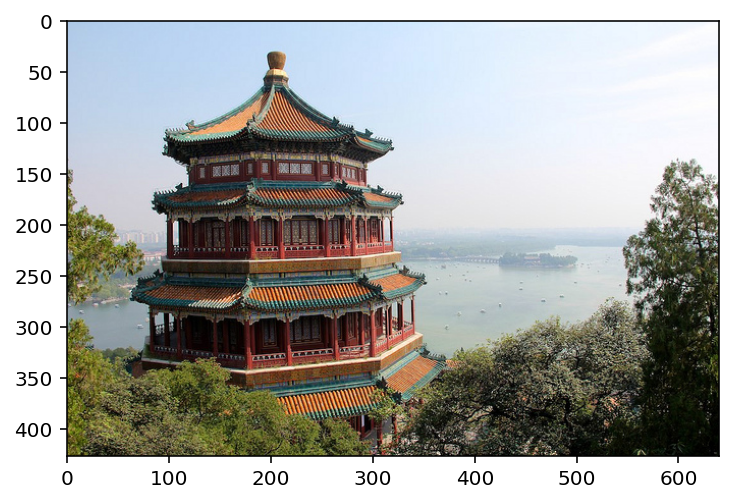

In [97]:
# Load samples images
images = np.asarray(load_sample_images().images)
print(f'Number of images: {len(images)}. Images tensor: {images.shape}')

first_image = images[0]
# Display first image
plt.imshow(first_image)

# Print details about first image
print(f'First image: {first_image.shape}')

### Question

Store in variables respectively named `rgb_values_topleft` and `rgb_values_bottomright` the RGB values of the top-left and bottom-right pixels of the first image.

In [111]:
# YOUR CODE HERE
print(first_image.shape)
#print(first_image)
rgb_values_topleft = first_image[0, 639]
print(rgb_values_topleft)
rgb_values_bottomright = first_image[426, 0]
print(rgb_values_bottomright)

(427, 640, 3)
[250 251 255]
[116 103  35]


In [112]:
print(f'Top-left pixel: {rgb_values_topleft}')
assert rgb_values_topleft.shape == (3,)
print(f'Bottom-right pixel: {rgb_values_bottomright}')
assert rgb_values_bottomright.shape == (3,)

Top-left pixel: [250 251 255]
Bottom-right pixel: [116 103  35]


### Question

Reshape the previous `images` tensor into a 2D tensor.

In [118]:
# YOUR CODE HERE
images = images.reshape(2, 819840)
images


array([174, 201, 231], dtype=uint8)

In [115]:
# Assert new tensor dimensions
assert images.shape == (2, 819840)
# Assert RGB values of top-left in first image
assert np.array_equal(rgb_values_topleft, images[0,:3])
# Assert RGB values of bottom-right pixel in first image
assert np.array_equal(rgb_values_bottomright, images[0,819837:])

AssertionError: 